In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf


In [2]:
# Load saved model
model = tf.keras.models.load_model("my_model.h5")  # change filename if different


In [3]:
# If you saved history as a .npy file in training script
history = np.load("history.npy", allow_pickle=True).item()


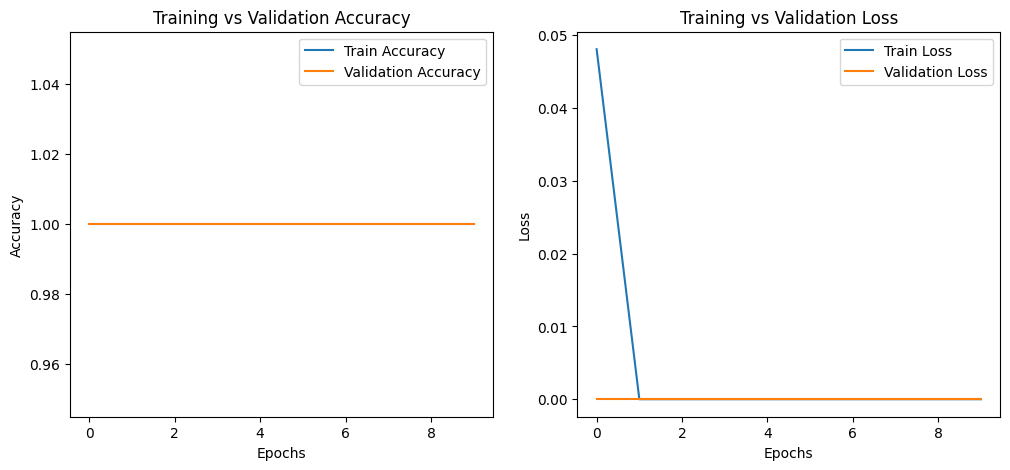

In [4]:
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Train Accuracy')
plt.plot(history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()


In [5]:
# Example: load test data from .npy or CSV
X_test = np.load("X_test.npy")
y_test = np.load("y_test.npy")


In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


Test Accuracy: 1.0000
Test Loss: 0.0000


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


c:\Users\Ankita\Desktop\university 4th year\DL LAB\tf-env\lib\site-packages\sklearn\metrics\_classification.py:534: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


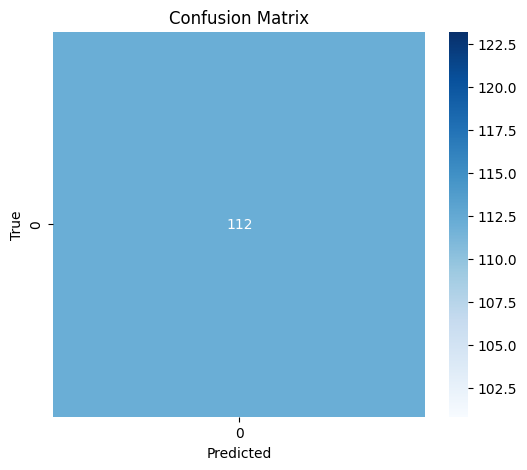

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       112

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112



In [7]:
# Predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


In [10]:
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split

# --- Load your dataset ---
df = pd.read_csv("scan_inventory.csv")  # change file name if needed

# Assuming last column is label
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# --- Remove rows with NaN in either features or label ---
mask = X.notna().all(axis=1) & y.notna()
X = X[mask]
y = y[mask]

print(f"Dataset size after removing NaNs: {len(X)}")
print("Full dataset label counts:", Counter(y))

# --- Split into train/val/test ---
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("\nTrain label counts:", Counter(y_train))
print("Validation label counts:", Counter(y_val))
print("Test label counts:", Counter(y_test))

# --- Check for duplicate rows between splits ---
train_set = pd.concat([X_train, y_train], axis=1)
val_set = pd.concat([X_val, y_val], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)

overlap_train_val = pd.merge(train_set, val_set, how='inner')
overlap_train_test = pd.merge(train_set, test_set, how='inner')
overlap_val_test = pd.merge(val_set, test_set, how='inner')

print(f"\nDuplicates between Train & Val: {len(overlap_train_val)}")
print(f"Duplicates between Train & Test: {len(overlap_train_test)}")
print(f"Duplicates between Val & Test: {len(overlap_val_test)}")


Dataset size after removing NaNs: 0
Full dataset label counts: Counter()


ValueError: With n_samples=0, test_size=0.3 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.